In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import *
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, accuracy_score
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv("data/public_train_trx.csv")
test_df = pd.read_csv("data/public_test_trx.csv")
alldf = pd.concat([train_df,test_df])
alldf = alldf.sort_values(['session_id','duration_of_session','click_num'])
alldf = alldf.reset_index(drop=True)
target = 'TARGET_successful_purchase'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
alldf = alldf.fillna(-1)
aggregalando_valtozok = list(alldf.columns)
aggregalando_valtozok.remove('test_or_train_flag')
aggregalando_valtozok.remove(target)
aggregalando_valtozok.remove('start_date_of_session')
aggregalando_valtozok.remove('start_time_of_session')
aggregalando_valtozok.remove('session_id')

In [4]:
cust_df = alldf.groupby('session_id',as_index=False).agg({target:'min',
                                        'test_or_train_flag':'min'})
for aggregalos_modszer in ['min','max','mean']:
    task={}
    ujoszlonevek=[]
    for v in aggregalando_valtozok:
        task[v]=aggregalos_modszer
        ujoszlonevek.append(aggregalos_modszer+"_"+v)
    stat = alldf.groupby(['session_id'],as_index=False).agg(task)
    stat.columns=['session_id']+ujoszlonevek
    cust_df = cust_df.merge(stat,on='session_id',how='left')

In [5]:
alldf

,TARGET_successful_purchase,basket_element_number,click_num,customer_age,customer_value,duration_of_session,last_order_of_customer,level_of_purchasing_process,lifetime_customer_account,max_val,...,num_of_previous_payments,price_of_cheapest_product_in_basket,price_of_more_expensive_product_in_basket,regio_of_customer,session_id,start_date_of_session,start_time_of_session,sum_price_of_products_in_basket,sum_price_of_visited_products,test_or_train_flag
0,-1.0,1,1,-1.0,-1.0,0.000,-1.0,-1.0,-1.0,-1.0,...,-1.0,49.99,49.99,-1.0,exxxxxshop.si-0.00021101047198248773,2019-02-08,10:30,49.99,49.99,1
1,-1.0,1,1,-1.0,-1.0,3.834,-1.0,1.0,-1.0,-1.0,...,-1.0,49.99,49.99,-1.0,exxxxxshop.si-0.00021101047198248773,2019-02-08,10:30,49.99,49.99,1
2,-1.0,1,1,-1.0,-1.0,17.855,-1.0,1.0,-1.0,-1.0,...,-1.0,49.99,49.99,-1.0,exxxxxshop.si-0.00021101047198248773,2019-02-08,10:30,49.99,49.99,1
3,-1.0,1,1,-1.0,-1.0,37.397,-1.0,1.0,-1.0,-1.0,...,-1.0,49.99,49.99,-1.0,exxxxxshop.si-0.00021101047198248773,2019-02-08,10:30,49.99,49.99,1
4,-1.0,1,1,-1.0,-1.0,49.166,-1.0,1.0,-1.0,-1.0,...,-1.0,49.99,49.99,-1.0,exxxxxshop.si-0.00021101047198248773,2019-02-08,10:30,49.99,49.99,1
5,-1.0,1,2,42.0,491.0,110.492,64.0,-1.0,204.0,600.0,...,2.0,19.99,19.99,2.0,exxxxxshop.si-0.0002712991769484001,2019-02-08,10:20,19.99,39.98,1
6,-1.0,2,3,42.0,491.0,110.492,64.0,-1.0,204.0,600.0,...,2.0,9.99,19.99,2.0,exxxxxshop.si-0.0002712991769484001,2019-02-08,10:20,29.98,49.97,1
7,-1.0,3,4,42.0,491.0,110.492,64.0,-1.0,204.0,600.0,...,2.0,9.99,39.99,2.0,exxxxxshop.si-0.0002712991769484001,2019-02-08,10:20,69.97,89.96,1
8,-1.0,3,4,42.0,491.0,114.931,64.0,1.0,204.0,600.0,...,2.0,9.99,39.99,2.0,exxxxxshop.si-0.0002712991769484001,2019-02-08,10:20,69.97,89.96,1
9,-1.0,3,4,42.0,491.0,168.132,64.0,1.0,204.0,600.0,...,2.0,9.99,39.99,2.0,exxxxxshop.si-0.0002712991769484001,2019-02-08,10:20,69.97,89.96,1


In [6]:
bemeno_valtozok = list(cust_df.columns)[3:]
ismert_df = cust_df[ cust_df['test_or_train_flag']==0].copy()
x_train = ismert_df[bemeno_valtozok]
y_train = ismert_df[target]
x_pred = cust_df[cust_df['test_or_train_flag'] == 1][bemeno_valtozok]
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_pred = scaler.transform(x_pred)
print(f"Training set size: {x_train.shape}")

Training set size: (24584, 51)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [9]:
param_grid = {'n_estimators': [10, 50, 100], 'max_depth': [14]}
clf = GridSearchCV(RandomForestClassifier(),
                   scoring='roc_auc',
                   param_grid=param_grid, cv=5, n_jobs=4)

print(clf.fit(x_train, y_train))

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'n_estimators': [10, 50, 100], 'max_depth': [14]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)


In [10]:
best_i = np.argmax(clf.cv_results_['mean_test_score'])
print(f"Best auc: {np.max(clf.cv_results_['mean_test_score'])}")
print(f"Best params: {clf.cv_results_['params'][best_i]}")

Best auc: 0.8803900764911157
Best params: {'max_depth': 14, 'n_estimators': 100}


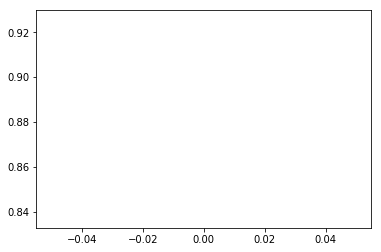

In [10]:
plt.imshow(clf.cv_results_['mean_test_score'])

In [ ]:
clf.cv_results_['params']

In [ ]:
pred = clf.predict_proba(x_train)[:, 1]
roc_auc_score(y_train, pred)

In [ ]:
y_train.to_numpy().astype(np.int).shape, pred.shape

In [ ]:
# aucs = []
# max_depths = []
# for max_depth in range(2,16):
#     cv_results = cross_validate(RandomForestClassifier(max_depth=max_depth),
#                                 x_train, y_train,
#                                 scoring=['roc_auc', 'accuracy'], cv=5)
#     auc = cv_results['test_roc_auc'].mean()
#     aucs.append(auc)
#     max_depths.append(max_depth)
#     print(f"Fa melyseg: {max_depth}\t{auc},\t{cv_results['test_accuracy'].mean()}")

In [16]:
cv_results = cross_validate(ExtraTreesClassifier(max_depth = 14, n_estimators = 1000),
                            x_train, y_train,
                            scoring=['roc_auc', 'accuracy'], cv=5, n_jobs=-1)
auc = cv_results['test_roc_auc'].mean()
print(f"\t{auc},\t{cv_results['test_accuracy'].mean()}")

	0.8731512030089903,	0.7925883959839977


In [ ]:
# plt.plot(max_depths, aucs)
# plt.show()
# print(f"Best max_depth: {max_depths[np.argmax(aucs)]}")
# print(f"Best auc: {np.max(aucs)}")

In [20]:
model = ExtraTreesClassifier(max_depth = 14, n_estimators = 1000)
model.fit(x_train, y_train)
pred = model.predict_proba(x_pred)
# accuracy_score(ismert_df[target],model.predict(ismert_df[bemeno_valtozok]))

In [21]:
res_df = pd.DataFrame({'session_id': cust_df[cust_df['test_or_train_flag'] == 1].session_id, 'prob': pred[:, 1]})
res_df.to_csv('res.csv', index=False)